In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage,dendrogram

# Cargar los datos
unpopular_songs = pd.read_csv('unpopular_songs.csv')



## **EDA**

In [ ]:
unpopular_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.722,0.476,5,-8.203,1,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
1,0.955,0.281,0,-11.392,0,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
2,0.753,0.355,8,-11.799,1,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
3,0.650,0.331,3,-10.818,0,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
4,0.690,0.360,4,-15.624,0,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV


In [ ]:
unpopular_songs.shape

(4073, 17)

In [ ]:
unpopular_songs.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'explicit', 'popularity', 'track_name', 'track_artist',
       'track_id'],
      dtype='object')

In [ ]:
unpopular_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 0 to 4072
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4073 non-null   float64
 1   energy            4073 non-null   float64
 2   key               4073 non-null   int64  
 3   loudness          4073 non-null   float64
 4   mode              4073 non-null   int64  
 5   speechiness       4073 non-null   float64
 6   acousticness      4073 non-null   float64
 7   instrumentalness  4073 non-null   float64
 8   liveness          4073 non-null   float64
 9   valence           4073 non-null   float64
 10  tempo             4073 non-null   float64
 11  duration_ms       4073 non-null   int64  
 12  explicit          4073 non-null   bool   
 13  popularity        4073 non-null   int64  
 14  track_name        4073 non-null   object 
 15  track_artist      4073 non-null   object 
 16  track_id          4073 non-null   object 


In [ ]:
unpopular_songs.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,4073.0,0.584909,0.195275,0.00000,0.4600,0.608000,0.732,0.973
energy,4073.0,0.545931,0.253181,0.00002,0.3720,0.565000,0.736,1.000
key,4073.0,5.171372,3.571346,0.00000,2.0000,5.000000,8.000,11.000
loudness,4073.0,-10.877235,6.082619,-43.04600,-13.1810,-9.338000,-6.693,0.416
mode,4073.0,0.658237,0.474359,0.00000,0.0000,1.000000,1.000,1.000
speechiness,4073.0,0.142364,0.169173,0.00000,0.0386,0.060300,0.195,0.962
acousticness,4073.0,0.327200,0.334721,0.00000,0.0302,0.194000,0.589,0.996
instrumentalness,4073.0,0.199610,0.348140,0.00000,0.0000,0.000037,0.219,1.000
liveness,4073.0,0.198481,0.177769,0.01650,0.0963,0.124000,0.241,0.990
valence,4073.0,0.468564,0.273403,0.00000,0.2490,0.460000,0.684,0.987


In [ ]:
unpopular_songs.drop(["track_id","track_name","track_artist"],axis=1,inplace=True)
unpopular_songs.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity
0,0.722,0.476,5,-8.203,1,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,False,8
1,0.955,0.281,0,-11.392,0,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,True,0


In [ ]:
unpopular_songs.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
dtype: int64

In [ ]:
categorical_list=[]
numerical_list=[]


for column_name in unpopular_songs.columns:
    unique_values = len(unpopular_songs[column_name].unique())
    if unique_values<20:
        categorical_list.append(column_name)
    else:
        numerical_list.append(column_name)

In [ ]:
categorical_list

['key', 'mode', 'explicit', 'popularity']

In [ ]:
numerical_list

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

<ipython-input-12-a5e922c02f3c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unpopular_songs[i])
<ipython-input-12-a5e922c02f3c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unpopular_songs[i])
<ipython-input-12-a5e922c02f3c>:7: UserWarning: 

`distplot` is a deprecated function and will

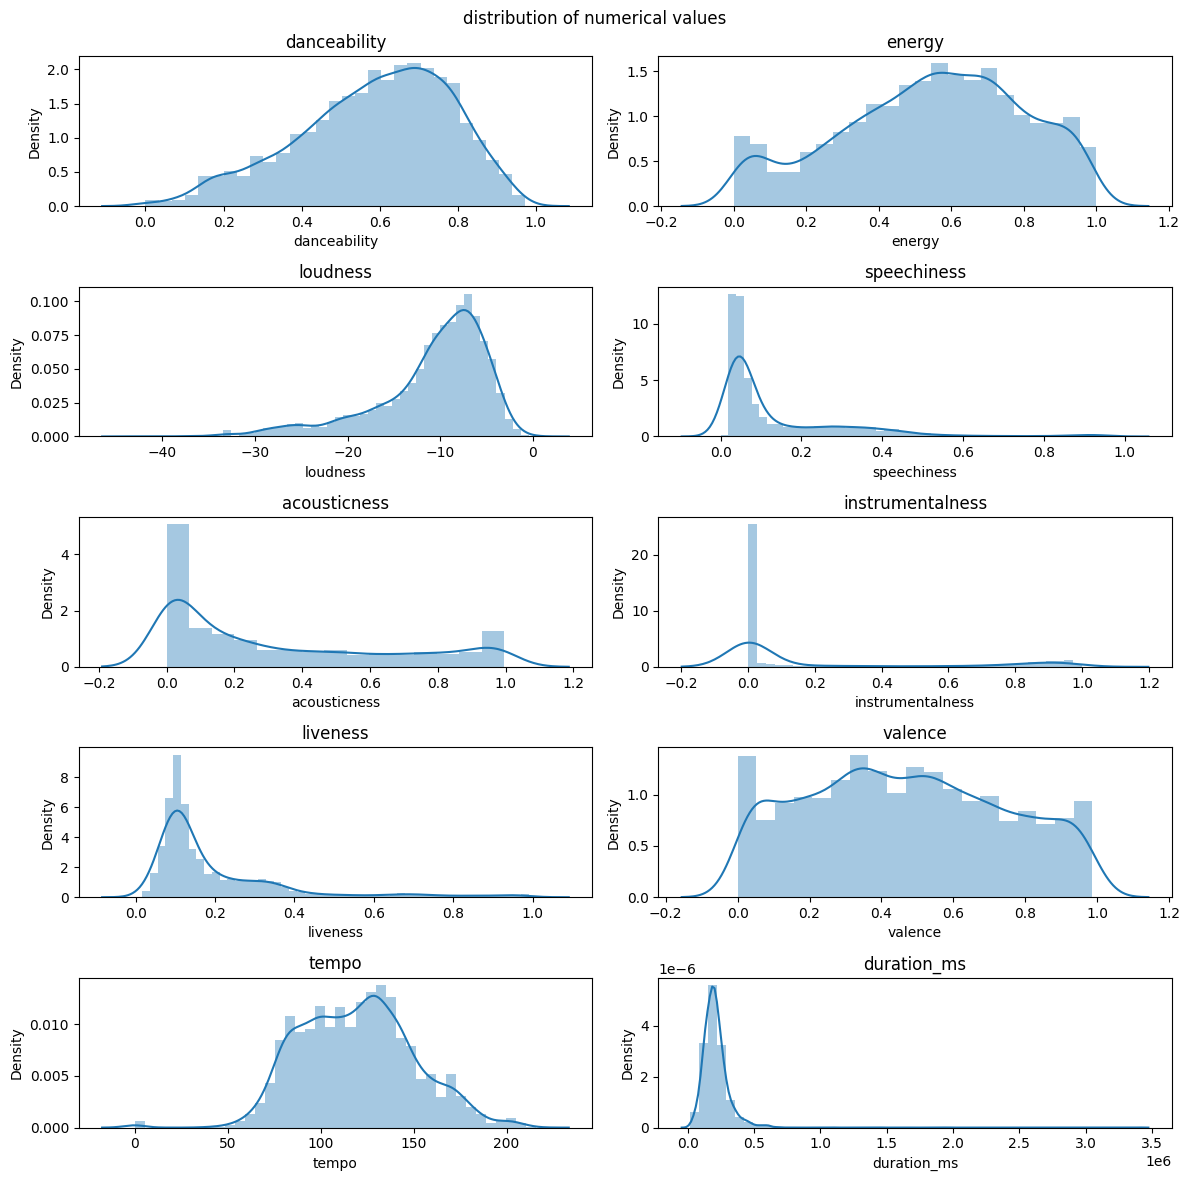

In [ ]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
plt.tight_layout()
for i in unpopular_songs.loc[:,numerical_list]:
    plt.subplot(5,2,k)
    sns.distplot(unpopular_songs[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

In [ ]:
for i in unpopular_songs.loc[:,numerical_list]:
    Q1 = unpopular_songs[i].quantile(0.25)
    Q3 = unpopular_songs[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if unpopular_songs[(unpopular_songs[i] > up) | (unpopular_songs[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

danceability yes
energy no
loudness yes
speechiness yes
acousticness no
instrumentalness yes
liveness yes
valence no
tempo yes
duration_ms yes


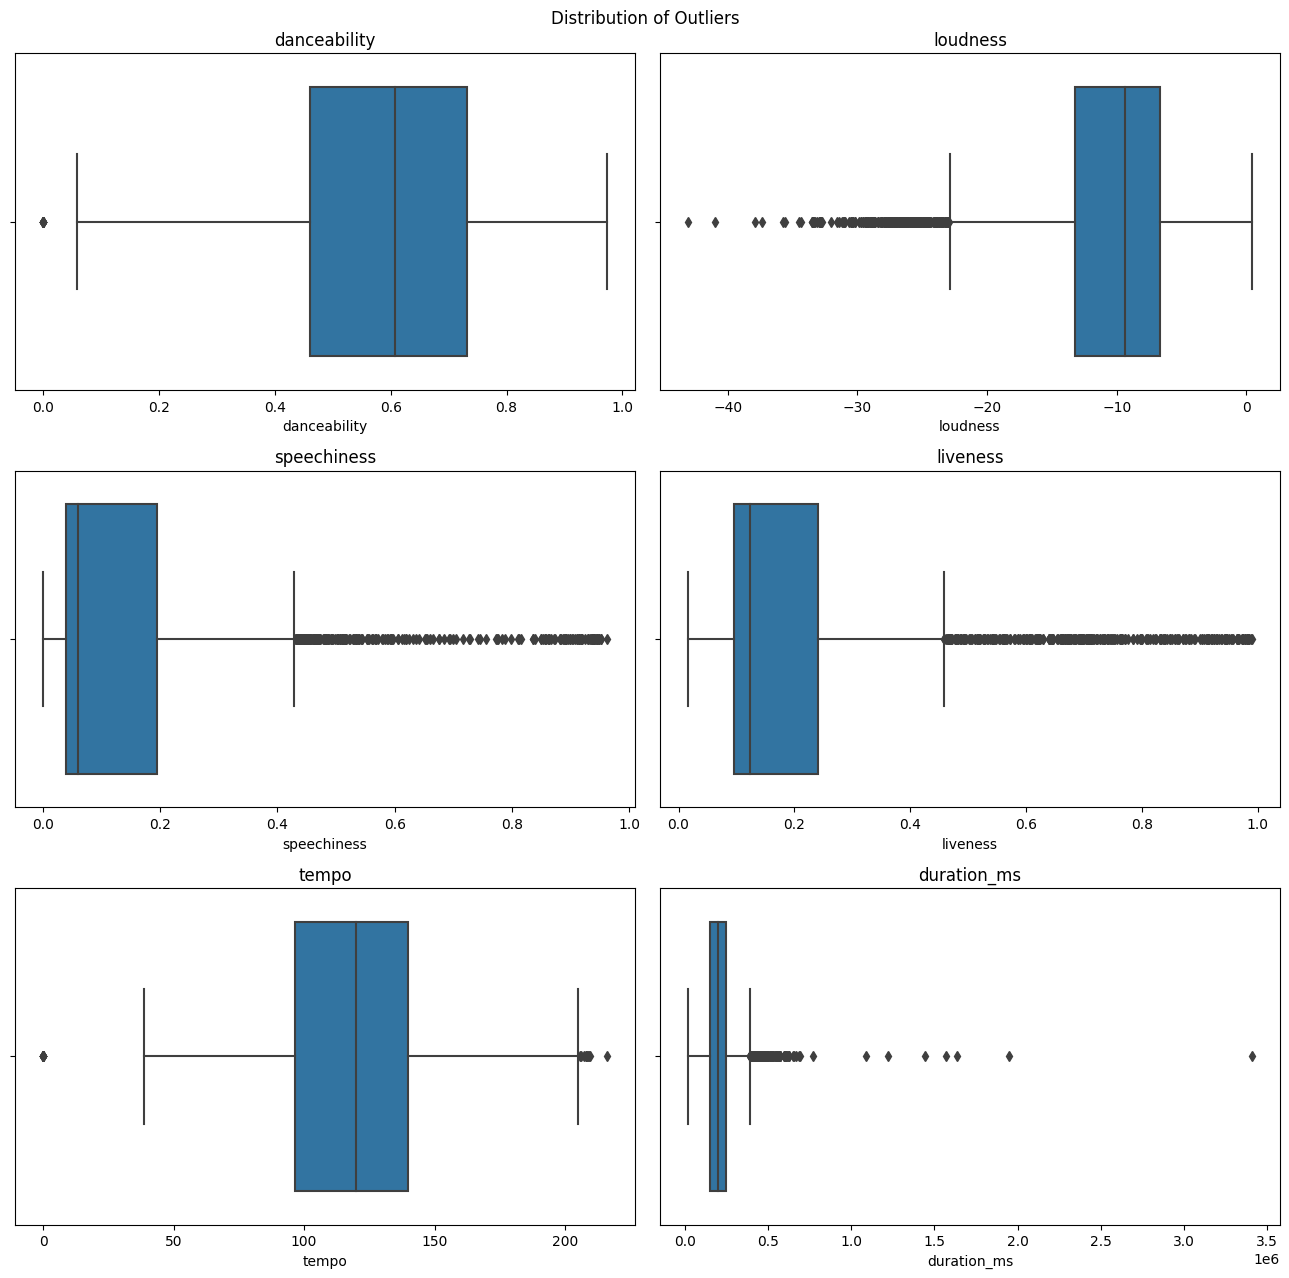

In [ ]:
outliers_list=["danceability","loudness","speechiness","liveness","tempo","duration_ms"]
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in unpopular_songs.loc[:,outliers_list]:
    plt.subplot(3,2,k)
    sns.boxplot(x = i, data = unpopular_songs.loc[:,outliers_list])
    plt.title(i)
    plt.tight_layout()
    k+=1

In [ ]:
for i in unpopular_songs.loc[:,outliers_list]:
    Q1 = unpopular_songs[i].quantile(0.25)
    Q3 =  unpopular_songs[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    unpopular_songs.loc[unpopular_songs[i] > up_lim,i] = up_lim
    unpopular_songs.loc[unpopular_songs[i] < low_lim,i] = low_lim

<ipython-input-16-14c0368a24ee>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unpopular_songs[i])
<ipython-input-16-14c0368a24ee>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unpopular_songs[i])
<ipython-input-16-14c0368a24ee>:7: UserWarning: 

`distplot` is a deprecated function and will

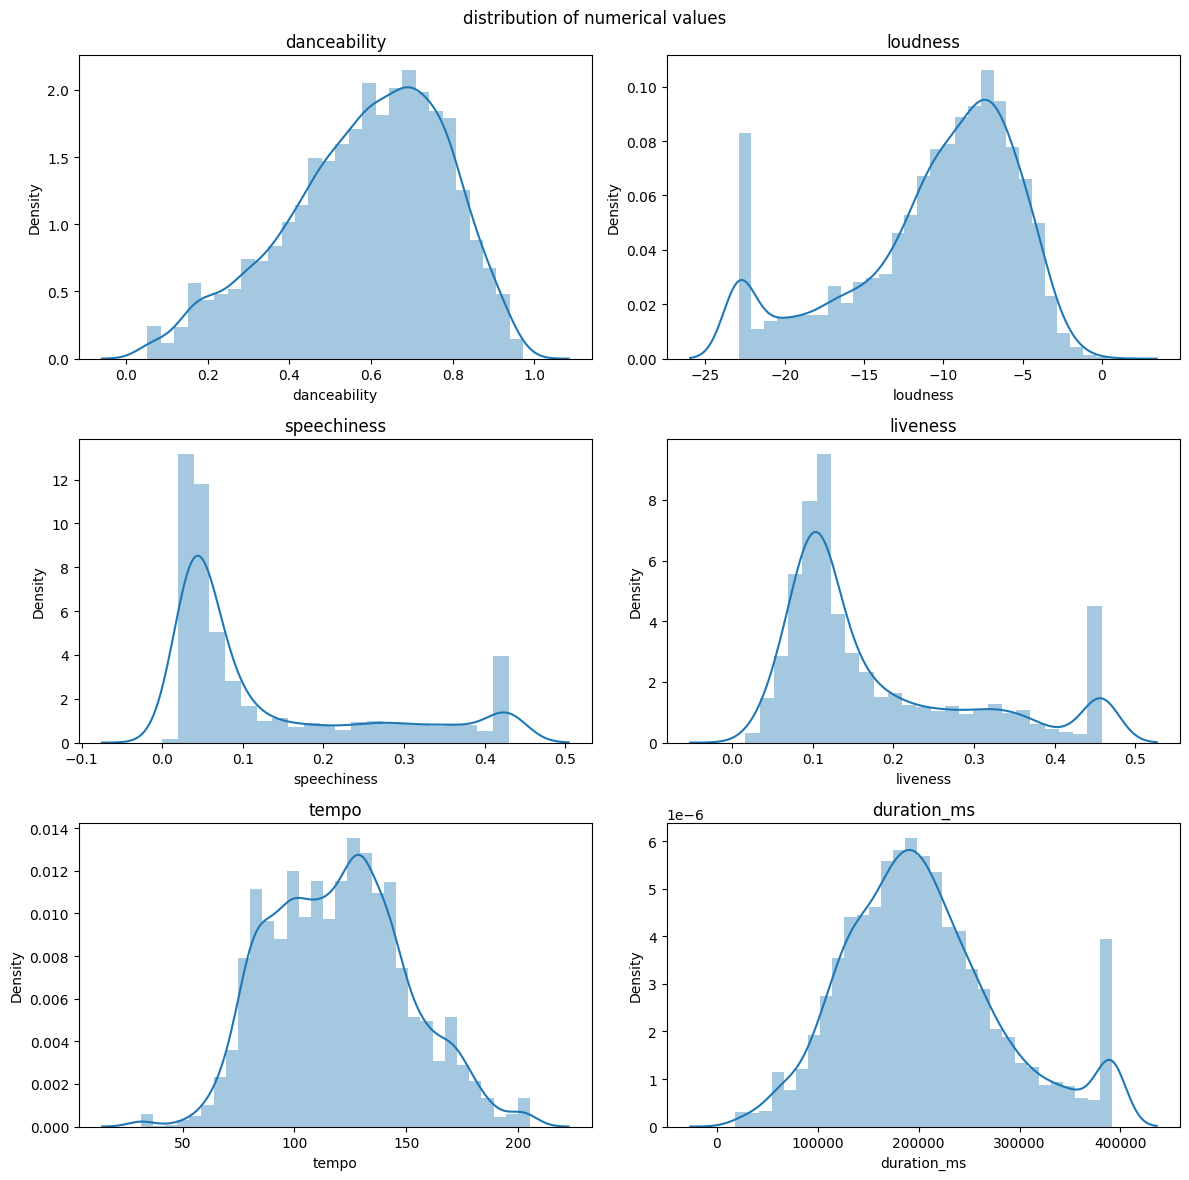

In [ ]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
plt.tight_layout()
for i in unpopular_songs.loc[:,outliers_list]:
    plt.subplot(3,2,k)
    sns.distplot(unpopular_songs[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

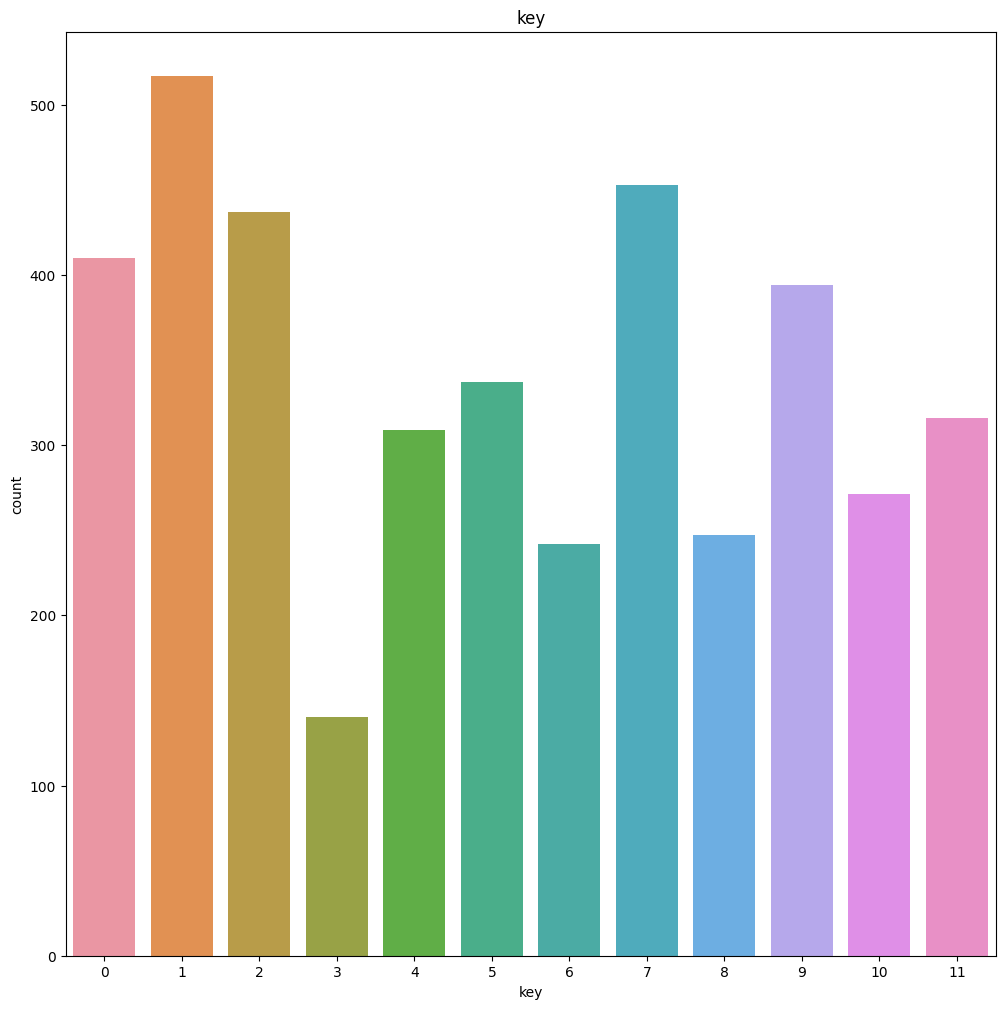

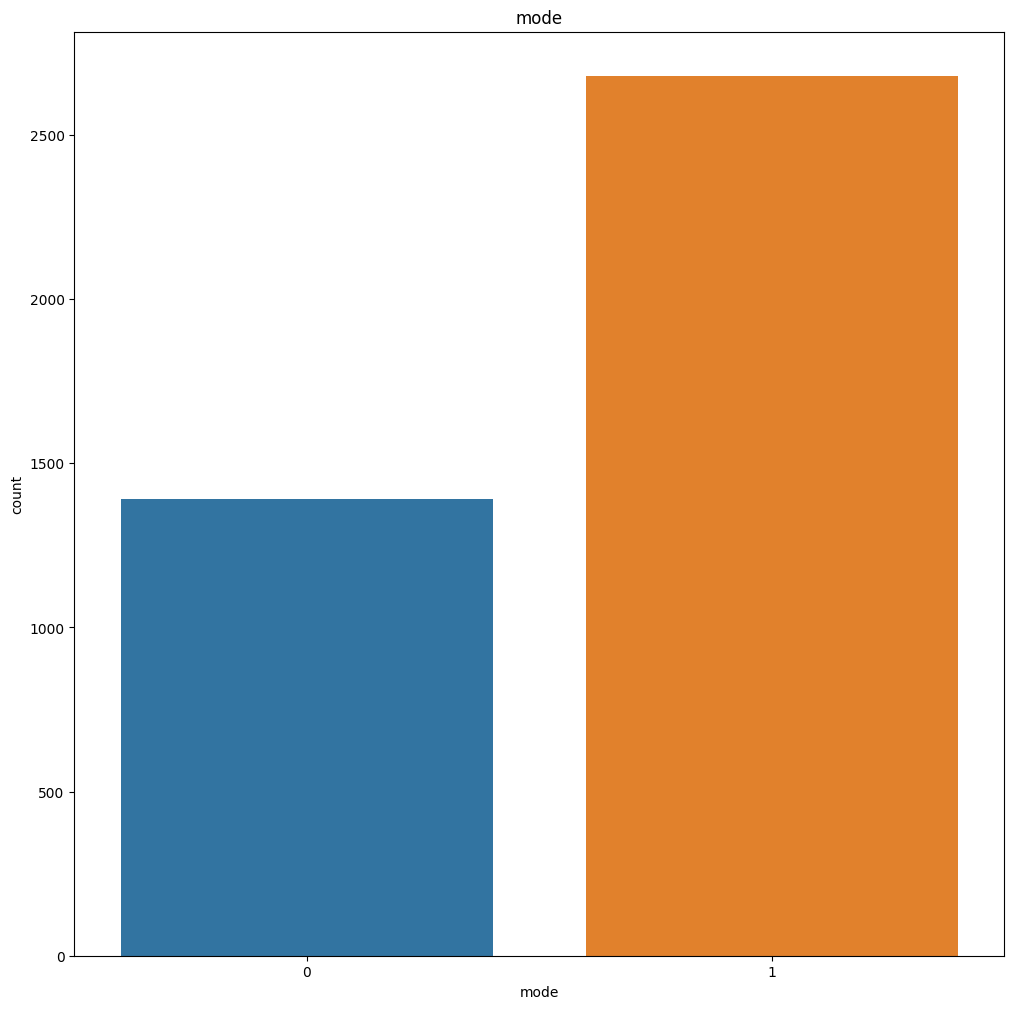

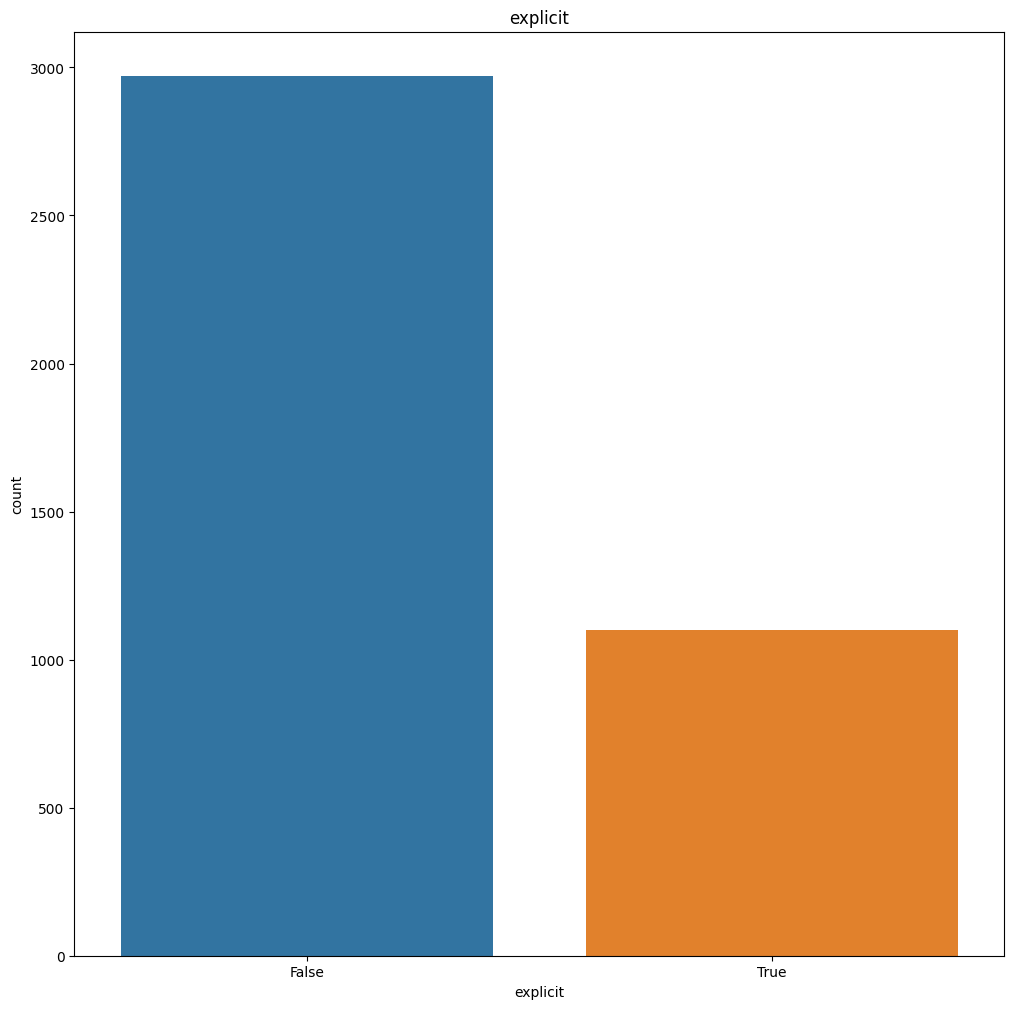

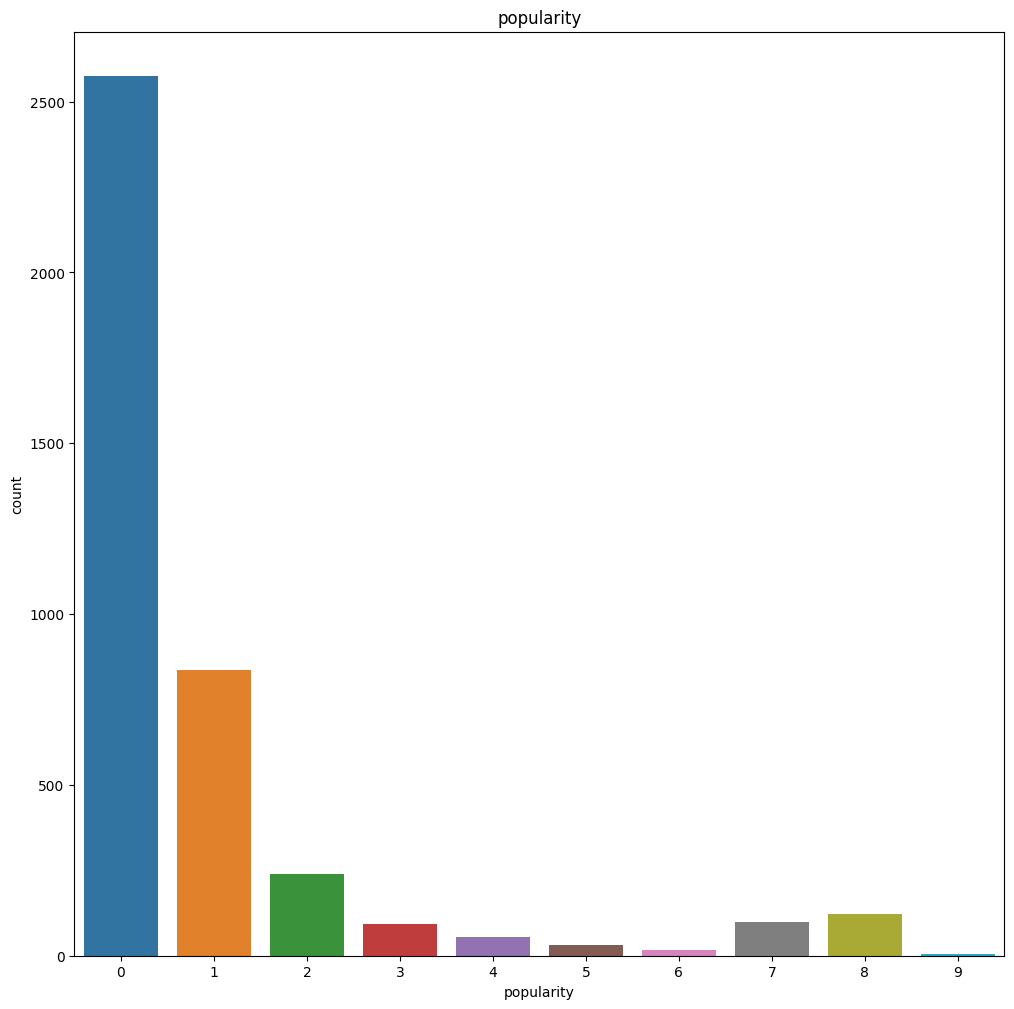

In [ ]:
for i in categorical_list:
    plt.figure(figsize=(12,12))
    sns.countplot(x = i, data = unpopular_songs.loc[:,categorical_list])
    plt.title(i)

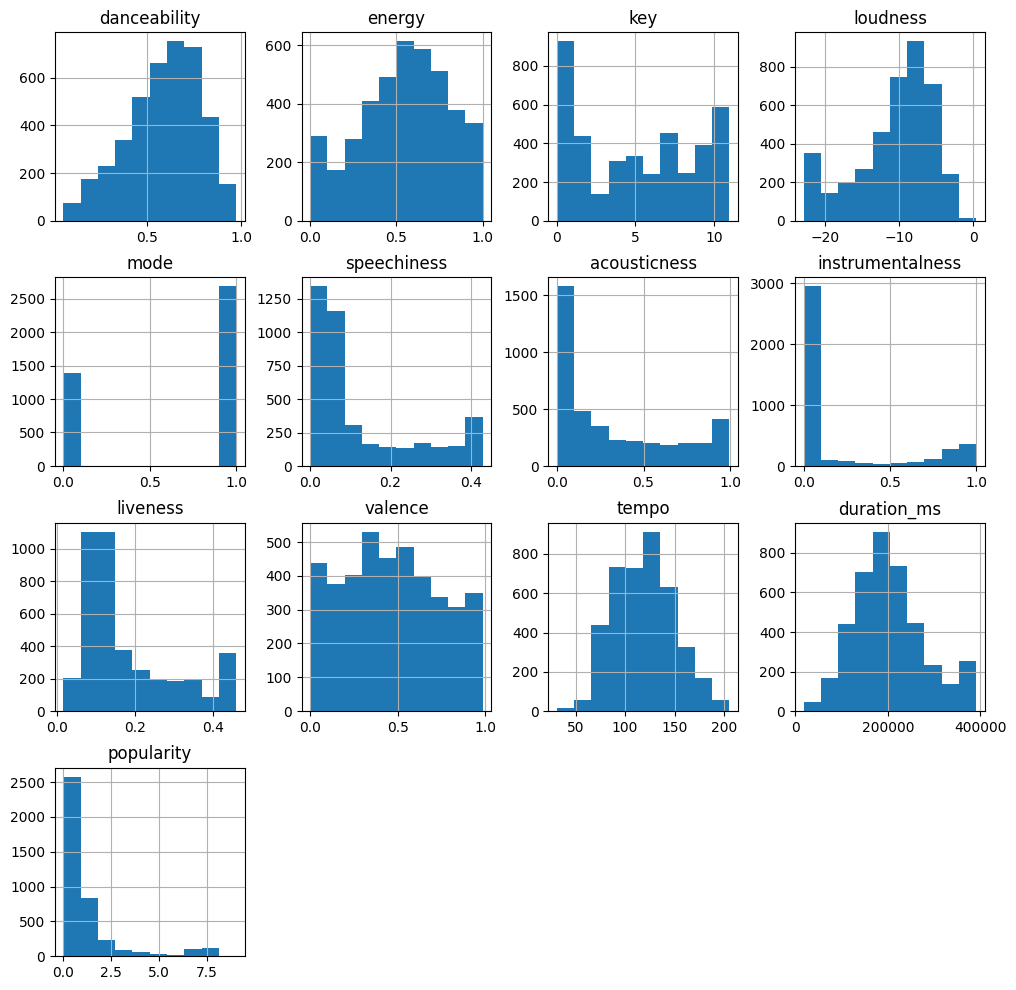

In [ ]:
unpopular_songs.hist(figsize=(12,12));

## **CLUSTERING**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

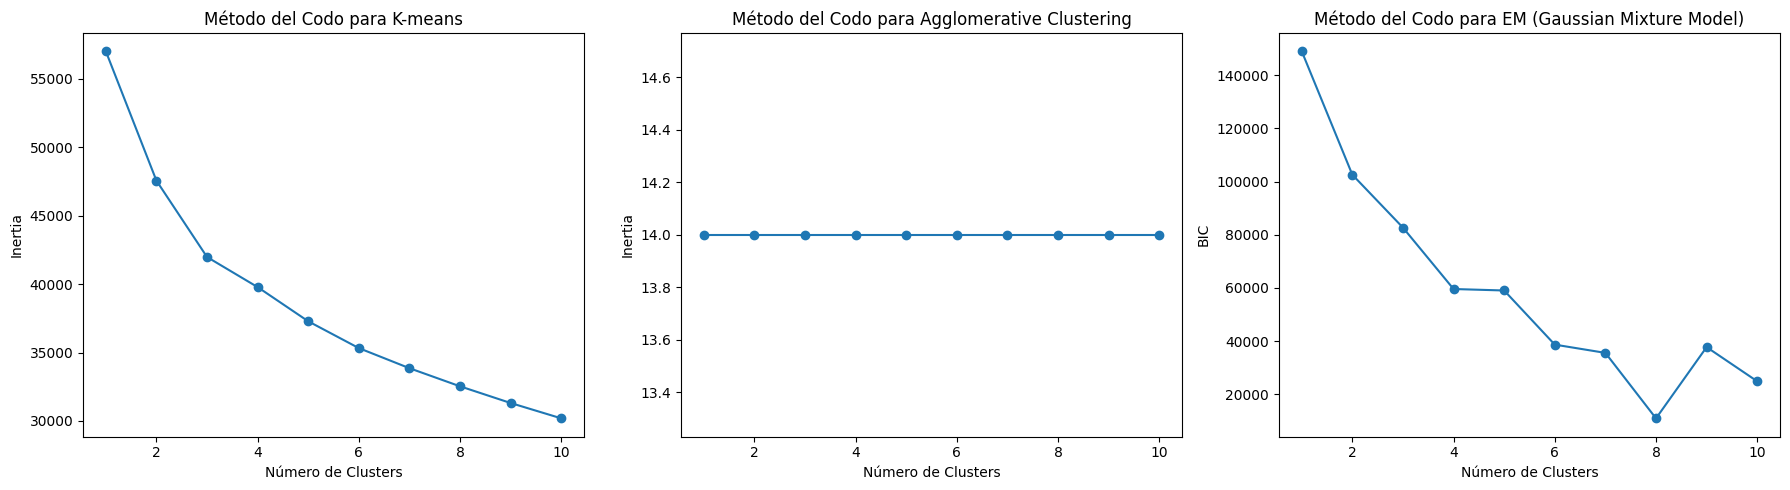

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar los datos
unpopular_songs = pd.read_csv('unpopular_songs.csv')

# Seleccionar las columnas relevantes para el clustering
features = unpopular_songs[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                             'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit', 'popularity']]

# Escalar las características para normalizar
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Método del codo para K-means
kmeans_inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    kmeans_inertia.append(kmeans.inertia_)

# Método del codo para Agglomerative Clustering
agg_inertia = []
for k in range(1, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg_clustering.fit_predict(scaled_features)
    agg_inertia.append(np.mean(np.sum((scaled_features - np.mean(scaled_features, axis=0))**2, axis=1)))

# Método del codo para EM (Gaussian Mixture Model)
em_bic = []
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_features)
    em_bic.append(gmm.bic(scaled_features))

# Visualización de los resultados del método del codo
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.plot(range(1, 11), kmeans_inertia, marker='o')
plt.title('Método del Codo para K-means')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')

plt.subplot(132)
plt.plot(range(1, 11), agg_inertia, marker='o')
plt.title('Método del Codo para Agglomerative Clustering')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')

plt.subplot(133)
plt.plot(range(1, 11), em_bic, marker='o')
plt.title('Método del Codo para EM (Gaussian Mixture Model)')
plt.xlabel('Número de Clusters')
plt.ylabel('BIC')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


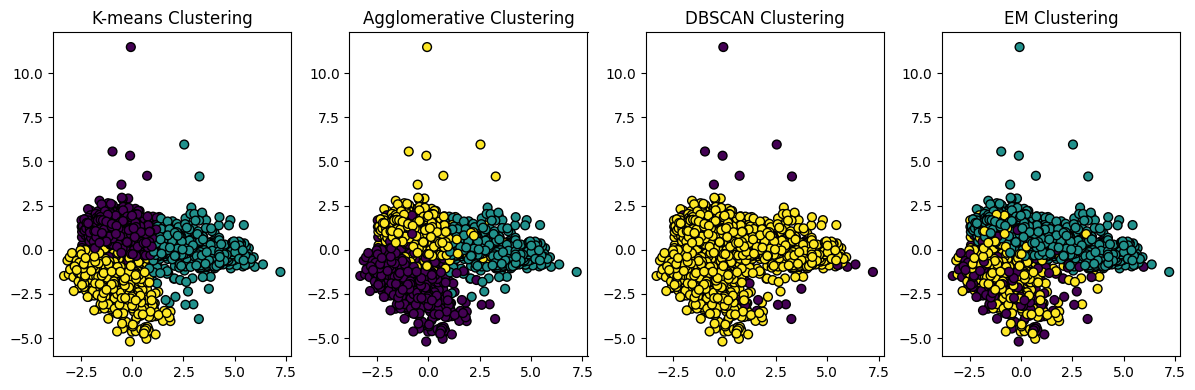

In [ ]:


# Seleccionar las columnas relevantes para el clustering
features = unpopular_songs[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                             'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit', 'popularity']]

# Escalar las características para normalizar
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reducción de dimensionalidad con PCA (puedes ajustar el número de componentes según tus necesidades)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(scaled_features)

# DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# EM Clustering (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)

# Visualización de los resultados
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=40)
plt.title('K-means Clustering')

plt.subplot(142)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=agg_labels, cmap='viridis', edgecolor='k', s=40)
plt.title('Agglomerative Clustering')

plt.subplot(143)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', s=40)
plt.title('DBSCAN Clustering')

plt.subplot(144)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=40)
plt.title('EM Clustering')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
from tabulate import tabulate

In [ ]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
kmeans_inertia = kmeans.inertia_
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)

# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(scaled_features)
agg_silhouette = silhouette_score(scaled_features, agg_labels)

# DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
dbscan_silhouette = silhouette_score(scaled_features, dbscan_labels)

# EM Clustering (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)
gmm_silhouette = silhouette_score(scaled_features, gmm_labels)

# Crear una tabla con los resultados
table = [["K-means", kmeans_inertia, kmeans_silhouette],
         ["Agglomerative", "N/A", agg_silhouette],  # La inercia no está disponible para Agglomerative
         ["DBSCAN", "N/A", dbscan_silhouette],  # La inercia no está disponible para DBSCAN
         ["EM (GMM)", "N/A", gmm_silhouette]]  # La inercia no está disponible para GMM

# Imprimir la tabla
print(tabulate(table, headers=["Método", "Inercia", "Silueta"], tablefmt="pretty"))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+---------------+-------------------+---------------------+
|    Método     |      Inercia      |       Silueta       |
+---------------+-------------------+---------------------+
|    K-means    | 41980.19913984716 | 0.16761569886957822 |
| Agglomerative |        N/A        | 0.14768043390875701 |
|    DBSCAN     |        N/A        | 0.40518817148594544 |
|   EM (GMM)    |        N/A        | 0.0708641502456189  |
+---------------+-------------------+---------------------+


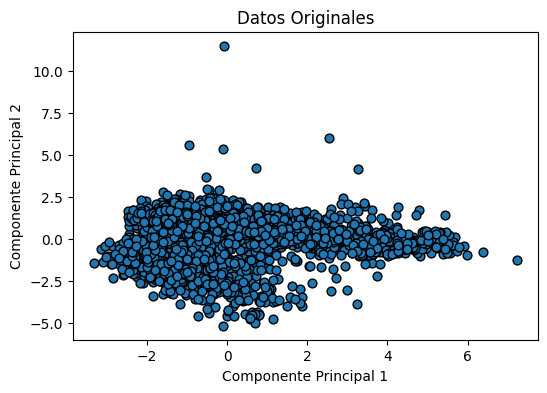

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


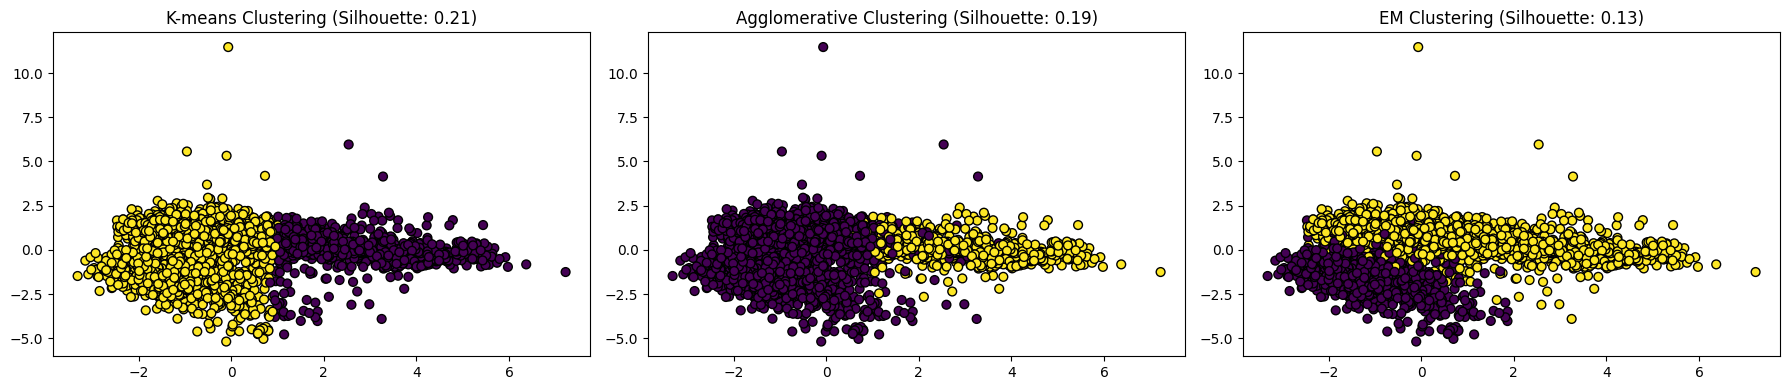

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


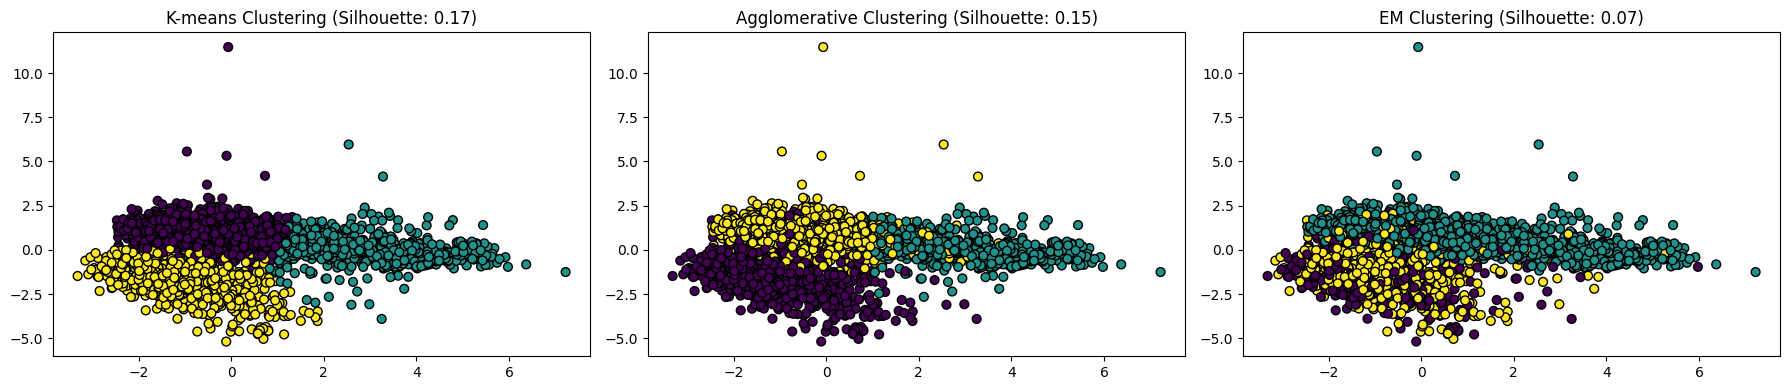

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


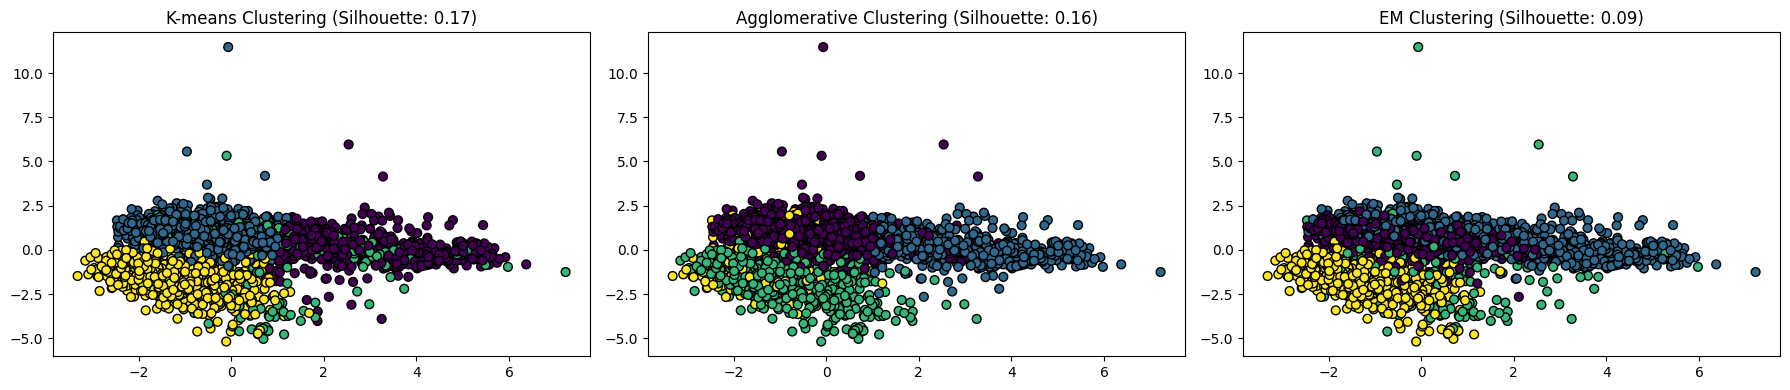

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


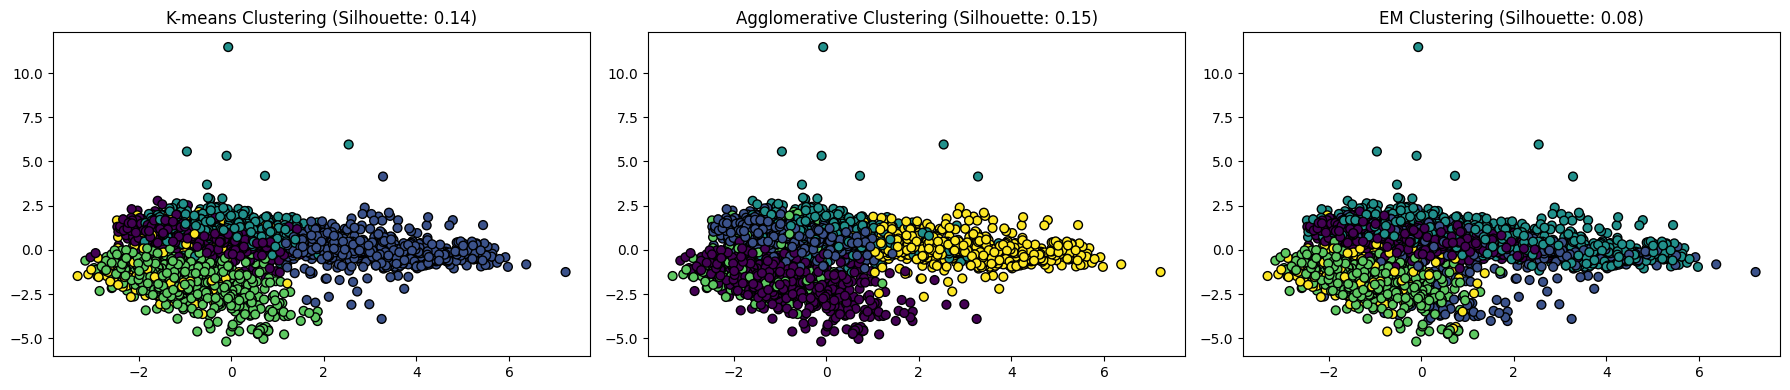

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


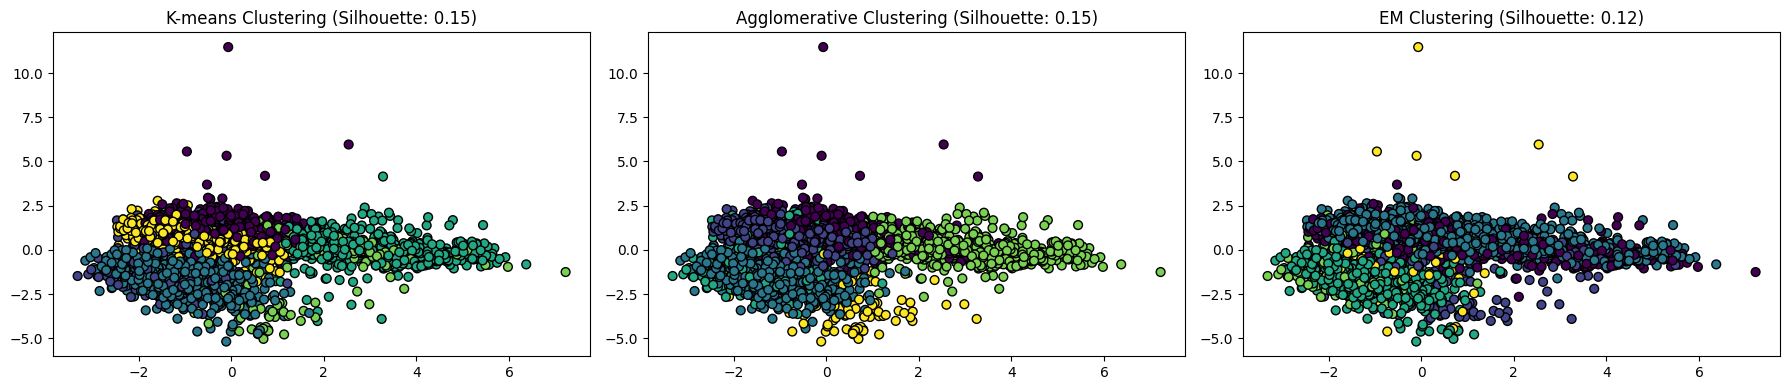

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


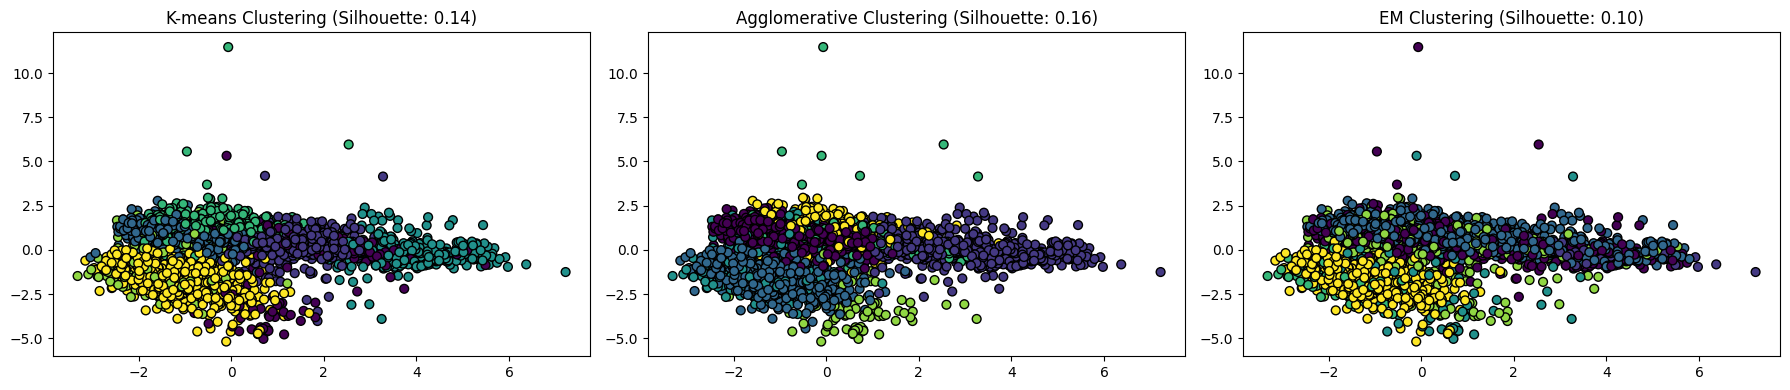

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar los datos
unpopular_songs = pd.read_csv('unpopular_songs.csv')

# Seleccionar las columnas relevantes para el clustering
features = unpopular_songs[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                             'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit', 'popularity']]

# Escalar las características para normalizar
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reducción de dimensionalidad con PCA (puedes ajustar el número de componentes según tus necesidades)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Visualización de los datos originales
plt.figure(figsize=(6, 4))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=40, edgecolor='k')
plt.title('Datos Originales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Experimentar con diferentes valores de clusters
num_clusters_range = range(2, 8)
for num_clusters in num_clusters_range:
    # K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_features)
    kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)

    # Agglomerative clustering
    agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
    agg_labels = agg_clustering.fit_predict(scaled_features)
    agg_silhouette = silhouette_score(scaled_features, agg_labels)

    # EM Clustering (Gaussian Mixture Model)
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(scaled_features)
    gmm_silhouette = silhouette_score(scaled_features, gmm_labels)

    # Visualización de los resultados
    plt.figure(figsize=(18, 4))

    plt.subplot(131)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, edgecolor='k', s=40)
    plt.title(f'K-means Clustering (Silhouette: {kmeans_silhouette:.2f})')

    plt.subplot(132)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=agg_labels, edgecolor='k', s=40)
    plt.title(f'Agglomerative Clustering (Silhouette: {agg_silhouette:.2f})')

    plt.subplot(133)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=gmm_labels, edgecolor='k', s=40)
    plt.title(f'EM Clustering (Silhouette: {gmm_silhouette:.2f})')

    plt.tight_layout()
    plt.show()
